In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I. Phân tích bộ dữ liệu

## 1. Tổng quan bộ dữ liệu

Bộ dữ liệu được sử dụng trong nghiên cứu là Heart Disease Dataset (UCI Machine Learning Repository), gồm 303 mẫu quan sát, mỗi mẫu tương ứng với một bệnh nhân. Dữ liệu bao gồm 13 biến đầu vào phản ánh các đặc điểm lâm sàng, cận lâm sàng và kết quả xét nghiệm tim mạch, cùng 1 biến mục tiêu (target) biểu thị mức độ mắc bệnh tim.

Biến mục tiêu target có giá trị từ 0 đến 4, trong đó:

0: Không mắc bệnh tim

1–4: Các mức độ khác nhau của bệnh tim (từ nhẹ đến nặng)


In [94]:
import pandas as pd

columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv(
    r"D:\Lan Huong\Cao hoc\Nam 1\Kì 1\7.ML\Huong\02VC_Group_09\datasets\heart-disease\processed.cleveland.data",
    header=None,
    names=columns
)

df.replace("?", pd.NA, inplace=True)

df = df.apply(pd.to_numeric)

X = df.drop(columns=["target"])
y = df["target"]


In [95]:
# Kích thước dữ liệu
print("Kích thước dữ liệu:", df.shape)

# Xem 5 dòng đầu
df.head()


Kích thước dữ liệu: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [96]:
# Kiểu dữ liệu của các cột
df.dtypes


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

## 2. Kiểm tra dữ liệu khuyết

Kết quả kiểm tra số lượng giá trị khuyết cho thấy:

Hầu hết các biến không có dữ liệu thiếu

Riêng biến ca thiếu 4 giá trị; Biến thal thiếu 2 giá trị

In [97]:
# Kiểm tra số lượng giá trị khuyết
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Kết quả kiểm tra cho thấy bộ dữ liệu chỉ xuất hiện giá trị khuyết tại hai biến ca (4 mẫu) và thal (2 mẫu), chiếm tỷ lệ rất nhỏ so với tổng số quan sát. Các biến còn lại không có giá trị thiếu.

In [98]:
# Check for NaN values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

## 3. Phân tích chi tiết

Một số biến có khả năng phân biệt rất tốt: cp, thalach, oldpeak, ca, thal

Một số biến có ảnh hưởng trung bình: age, sex, restecg, exang,  slope

Một số biến có ảnh hưởng thấp: fbs, chol

Các kết quả EDA cho thấy bộ dữ liệu có cấu trúc rõ ràng, phù hợp để áp dụng các mô hình học máy trong bước tiếp theo nhằm dự đoán bệnh tim.

In [99]:
# So sánh số lượng mẫu có bệnh, không có bệnh
label_counts = df['target'].value_counts()
print(label_counts)

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


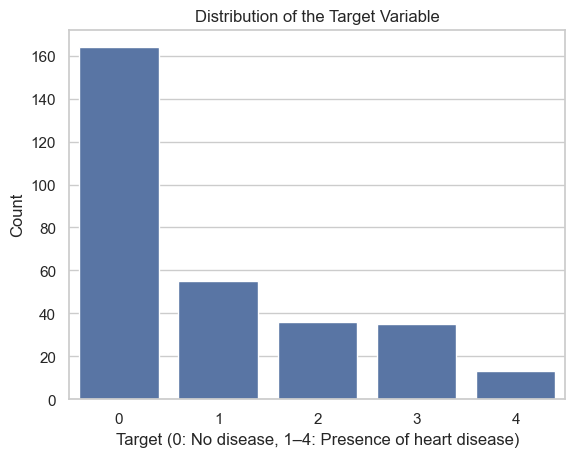

In [120]:
sns.countplot(x='target', data=df)
plt.title("Distribution of the Target Variable")
plt.xlabel("Target (0: No disease, 1–4: Presence of heart disease)")
plt.ylabel("Count")
plt.show()



In [122]:
df['target_binary'] = df['target'].apply(lambda x: 0 if x == 0 else 1)


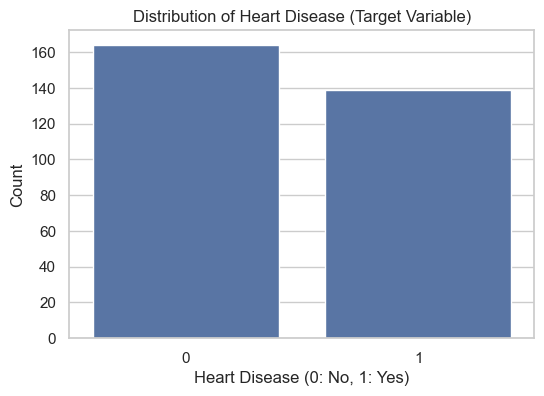

In [123]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target_binary', data=df)
plt.title("Distribution of Heart Disease (Target Variable)")
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


Không bệnh : 164 (54%)
Có bệnh    : 139 (46%)
Phân bố khá cân bằng

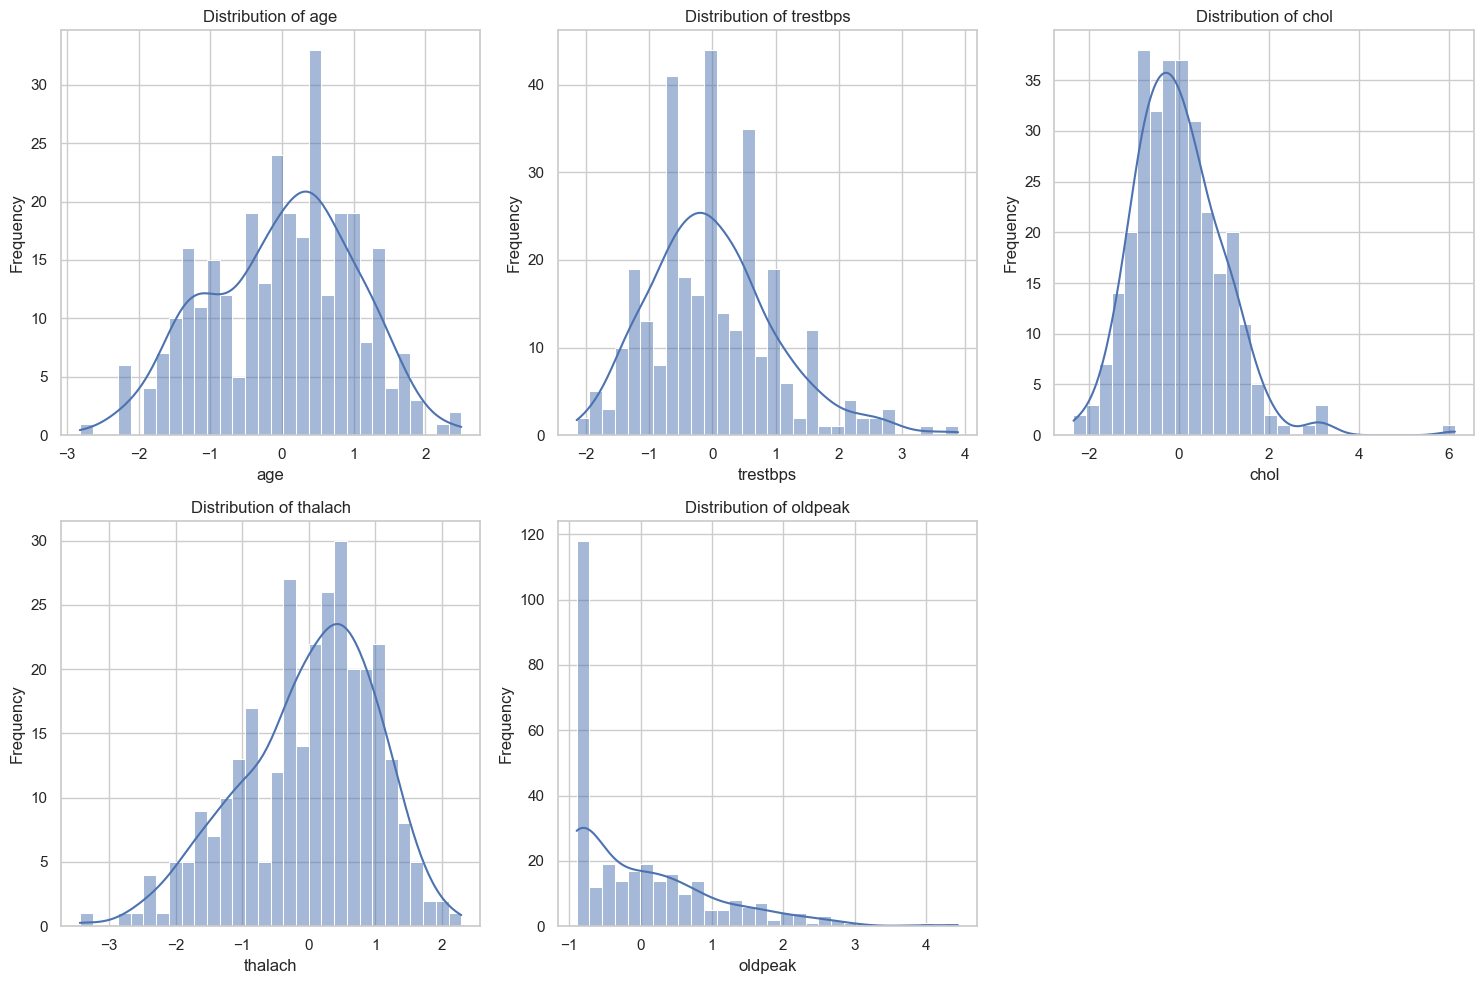

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['ca', 'cp', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


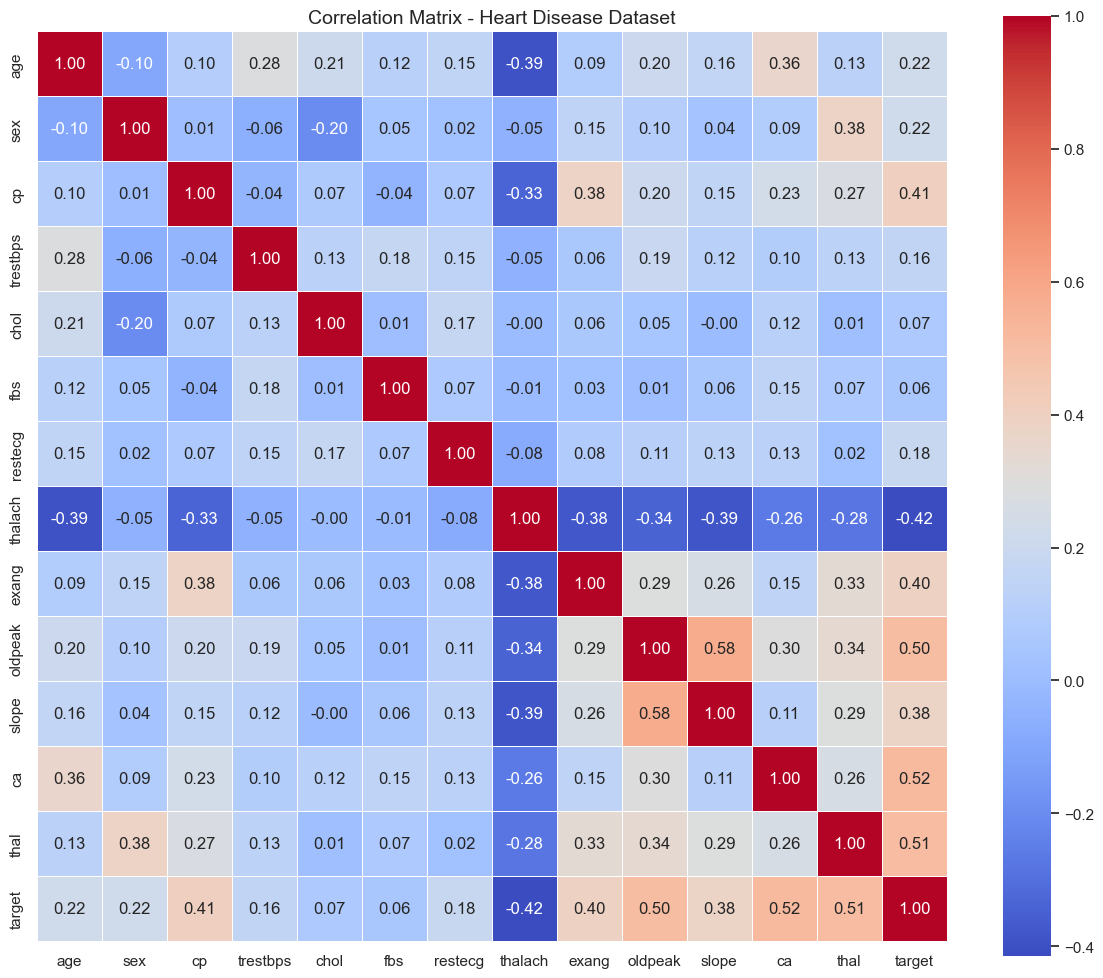

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính ma trận tương quan
corr = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,          # hiển thị giá trị hệ số tương quan
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Matrix - Heart Disease Dataset", fontsize=14)
plt.tight_layout()
plt.show()


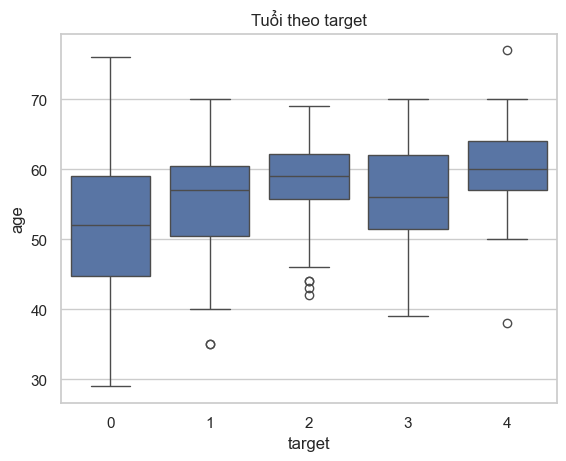

In [102]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Tuổi theo target")
plt.show()


Nhóm không mắc bệnh có độ tuổi thấp hơn so với các nhóm mắc bệnh, trong khi các mức bệnh nặng tập trung chủ yếu ở nhóm tuổi cao. Mặc dù vẫn tồn tại sự chồng lấn giữa các nhóm, kết quả cho thấy tuổi là một yếu tố quan trọng

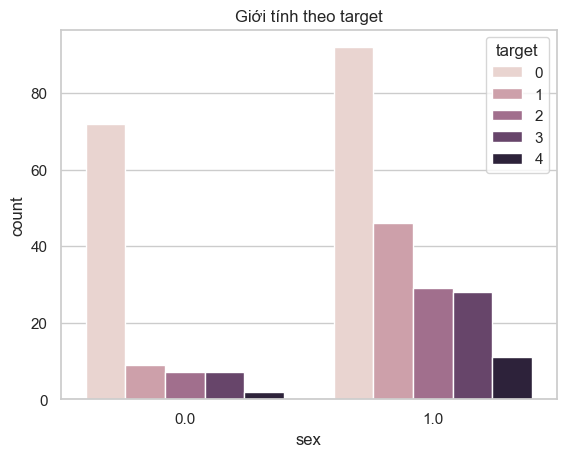

In [103]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Giới tính theo target")
plt.show()

Nam giới không chỉ chiếm số lượng mẫu lớn hơn mà còn có tỷ lệ mắc bệnh tim cao hơn đáng kể ở tất cả các mức độ. Trong khi đó, nữ giới chủ yếu thuộc nhóm không mắc bệnh và rất hiếm gặp các trường hợp bệnh nặng. Điều này cho thấy giới tính là một đặc trưng quan trọng và có ảnh hưởng mạnh đến khả năng dự đoán bệnh tim.

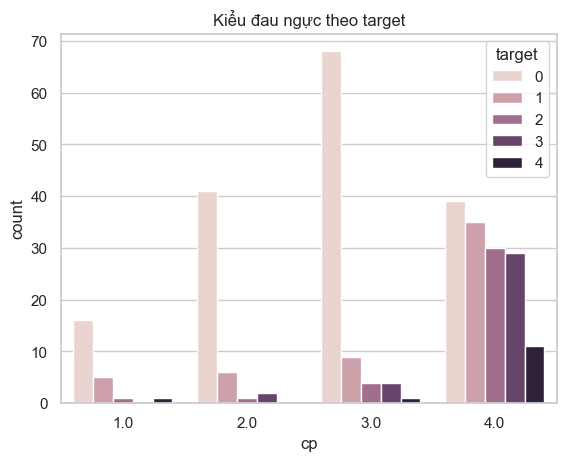

In [104]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Kiểu đau ngực theo target")
plt.show()


Biểu đồ cho thấy kiểu đau ngực (cp) có mối quan hệ rõ rệt với mức độ bệnh tim. Đặc biệt, nhóm bệnh nhân không có triệu chứng đau ngực cp = 4 (Asymptomatic)chiếm tỷ lệ cao ở các mức độ bệnh tim nặng, cho thấy đây là một đặc trưng có tính phân biệt cao và cần được ưu tiên trong quá trình huấn luyện mô hình.

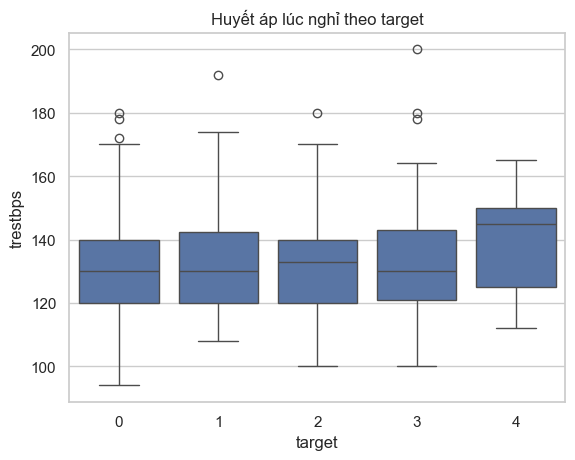

In [105]:
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Huyết áp lúc nghỉ theo target")
plt.show()



Huyết áp lúc nghỉ có độ chồng lấn cao giữa các target

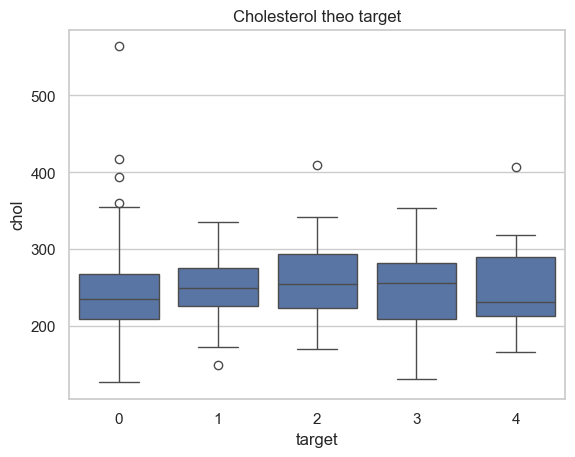

In [106]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol theo target")
plt.show()


Cholesterol có độ chồng lấn cao giữa các target

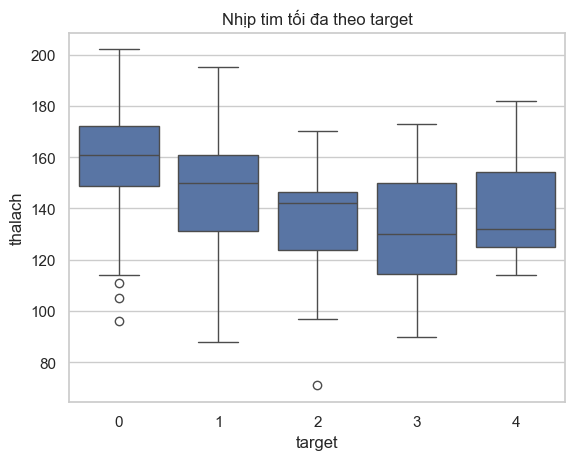

In [107]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Nhịp tim tối đa theo target")
plt.show()


Nhịp tim tối đa đạt được khi gắng sức (thalach) cho thấy mối quan hệ nghịch rõ ràng với mức độ bệnh tim. Bệnh nhân mắc bệnh tim nặng có xu hướng đạt nhịp tim tối đa thấp hơn đáng kể, khiến đặc trưng này trở thành một trong những yếu tố quan trọng nhất cho bài toán dự đoán bệnh tim.

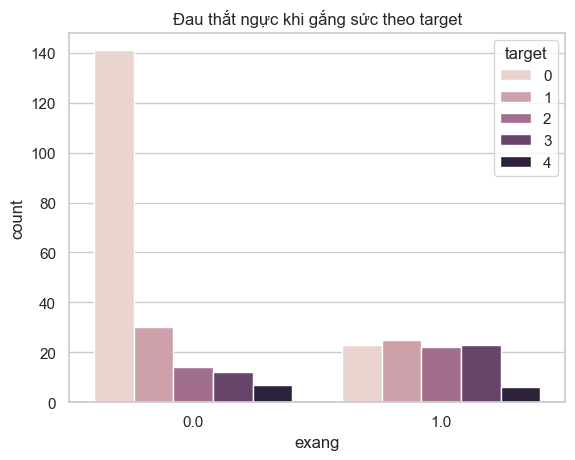

In [108]:
sns.countplot(x='exang', hue='target', data=df)
plt.title("Đau thắt ngực khi gắng sức theo target")
plt.show()


Khoảng 33% bệnh nhân có đau ngực khi gắng sức. Người bị đau khi gắng sức có xác suất bệnh tim cao hơn

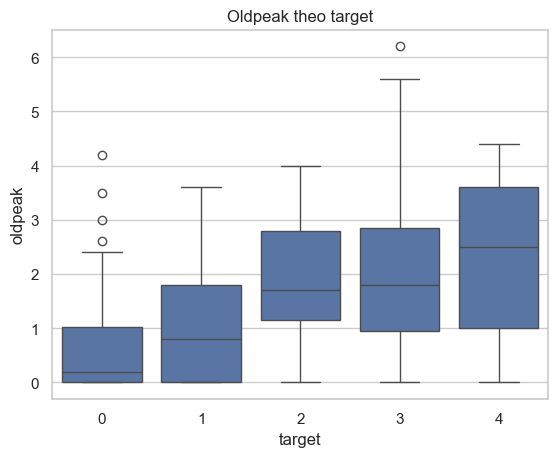

In [109]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("Oldpeak theo target")
plt.show()


Nhóm có bệnh tim có oldpeak cao hơn rõ rệt,
Đây là đặc trưng mạnh

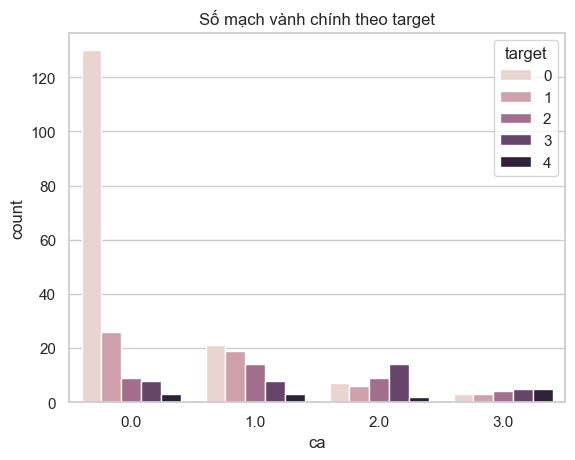

In [110]:
sns.countplot(x='ca', hue='target', data=df)
plt.title("Số mạch vành chính theo target")
plt.show()


ca = 0 chủ yếu ở nhóm không bệnh; ca ≥ 1 tăng mạnh tỷ lệ bệnh tim

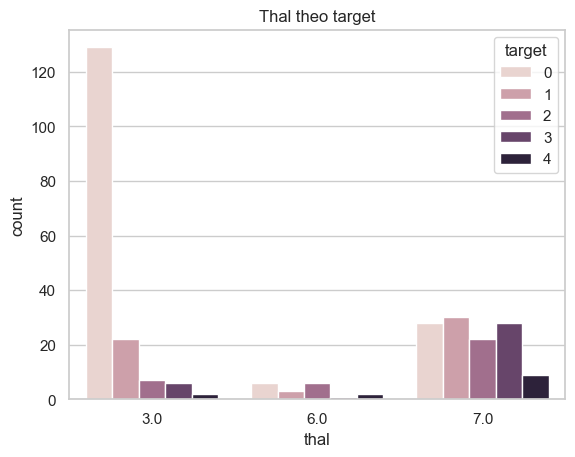

In [111]:
sns.countplot(x='thal', hue='target', data=df)
plt.title("Thal theo target")
plt.show()


Biến thal cho thấy khả năng phân biệt rõ rệt giữa nhóm không mắc bệnh tim (target=0) và nhóm mắc bệnh (target>0).
Đặc biệt, giá trị thal=3 gắn với trạng thái khỏe mạnh, trong khi thal=7 xuất hiện chủ yếu ở các mức độ bệnh tim.

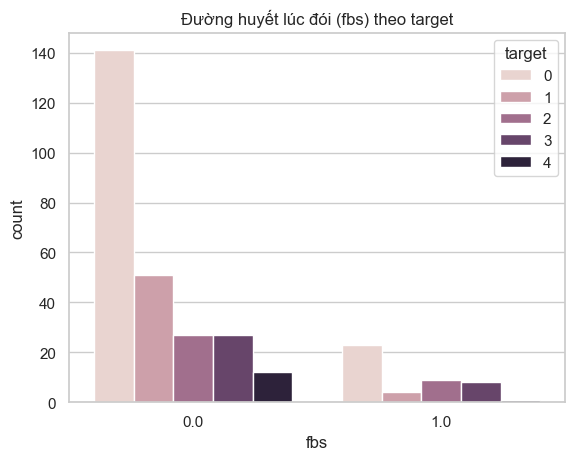

In [112]:
sns.countplot(x='fbs', hue='target', data=df)
plt.title("Đường huyết lúc đói (fbs) theo target")
plt.show()


Phần lớn bệnh nhân có fbs = 0 (đường huyết bình thường)

Nhóm fbs = 1 chiếm tỷ lệ nhỏ

Phân bố target giữa hai nhóm không khác biệt rõ rệt

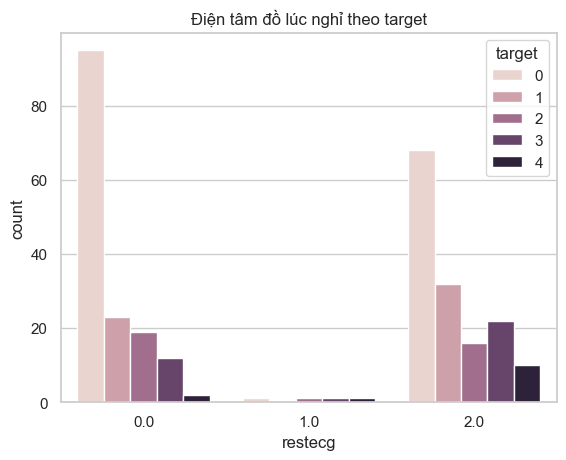

In [113]:
sns.countplot(x='restecg', hue='target', data=df)
plt.title("Điện tâm đồ lúc nghỉ theo target")
plt.show()


restecg = 0 (bình thường) xuất hiện nhiều nhất

restecg = 1 và 2 xuất hiện nhiều hơn ở các nhóm có bệnh

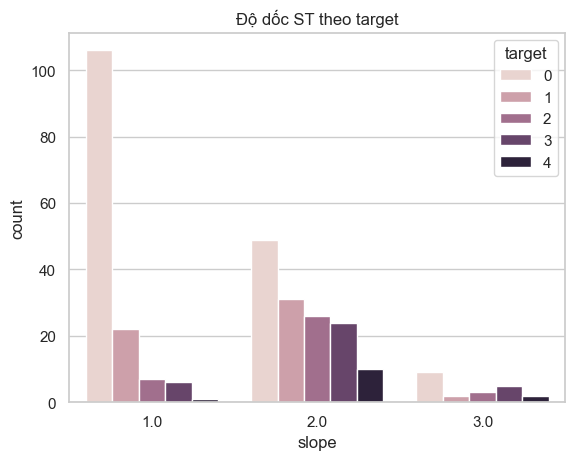

In [114]:
sns.countplot(x='slope', hue='target', data=df)
plt.title("Độ dốc ST theo target")
plt.show()


slope = 1 (upsloping) chủ yếu xuất hiện ở target = 0

slope = 2 và 3 xuất hiện nhiều ở các nhóm có bệnh

slope = 3 liên quan mạnh đến mức độ bệnh cao

# II. Tiền xử lý dữ liệu


## 1. Xử lý dữ liệu khuyết

Kết quả phân tích cho thấy:

Biến ca có 4 giá trị khuyết

Biến thal có 2 giá trị khuyết

Do số lượng dữ liệu thiếu rất nhỏ, áp dụng phương pháp thay thế bằng giá trị phổ biến nhất đối với các biến dạng rời rạc.

In [115]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])


## 2. Xử lý biến mục tiêu (target)
Biến target ban đầu có 5 giá trị (0–4), phản ánh các mức độ khác nhau của bệnh tim. Nếu phân chia thành 5 lớp sẽ bị mất cân bằng khi lớp 1,2,3,4 có số lượng ít mẫu. Để đơn giản hóa bài toán và phù hợp với các mô hình phân loại nhị phân, biến mục tiêu được chuyển đổi như sau:

0: Không mắc bệnh tim

1: Có mắc bệnh tim (gộp các mức 1–4)

In [116]:
df['target_binary'] = df['target'].apply(lambda x: 0 if x == 0 else 1)


## 3. Chuẩn hóa dữ liệu


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[num_cols] = scaler.fit_transform(df[num_cols])

# Save to CSV
OUTPUT_PATH = "D:\\Lan Huong\\Cao hoc\\Nam 1\\Kì 1\\7.ML\\Huong\\02VC_Group_09\\datasets\\heart-disease\\heart_disease_clean.csv"
df.to_csv(OUTPUT_PATH, index=False)

print(f"Clean dataset saved to {OUTPUT_PATH}")

Clean dataset saved to D:\Lan Huong\Cao hoc\Nam 1\Kì 1\7.ML\Huong\02VC_Group_09\datasets\heart-disease\heart_disease_clean.csv
